# Data Exploration

In [29]:
import os
import re

data_path = os.path.join(os.getcwd(), '..', 'data', 'subjects')
subjects = os.listdir(data_path)

# Only keep the folders with the format 'Proband[0-9]{2}'
subjects = [subject for subject in subjects if re.match(r'Proband[0-9]{2}', subject)]
subjects = sorted(subjects)

subjects

['Proband01',
 'Proband02',
 'Proband03',
 'Proband04',
 'Proband05',
 'Proband06',
 'Proband07',
 'Proband08',
 'Proband09',
 'Proband10',
 'Proband11',
 'Proband12',
 'Proband13',
 'Proband14',
 'Proband15',
 'Proband16',
 'Proband17',
 'Proband18',
 'Proband19',
 'Proband20',
 'Proband21',
 'Proband22',
 'Proband23',
 'Proband24',
 'Proband25',
 'Proband26']

In [30]:
# The scenarios in which the subjects were recorded
scenarios = [
    '101_natural_lighting',
    '102_artificial_lighting',
    '103_abrupt_changing_lighting',
    '104_dim_lighting_auto_exposure',
    '106_green_lighting',
    '107_infrared_lighting',
    '201_shouldercheck',
    '202_scale_movement',
    '203_translation_movement',
    '204_writing'
]

## Display the first frame of each scenario for the first subject

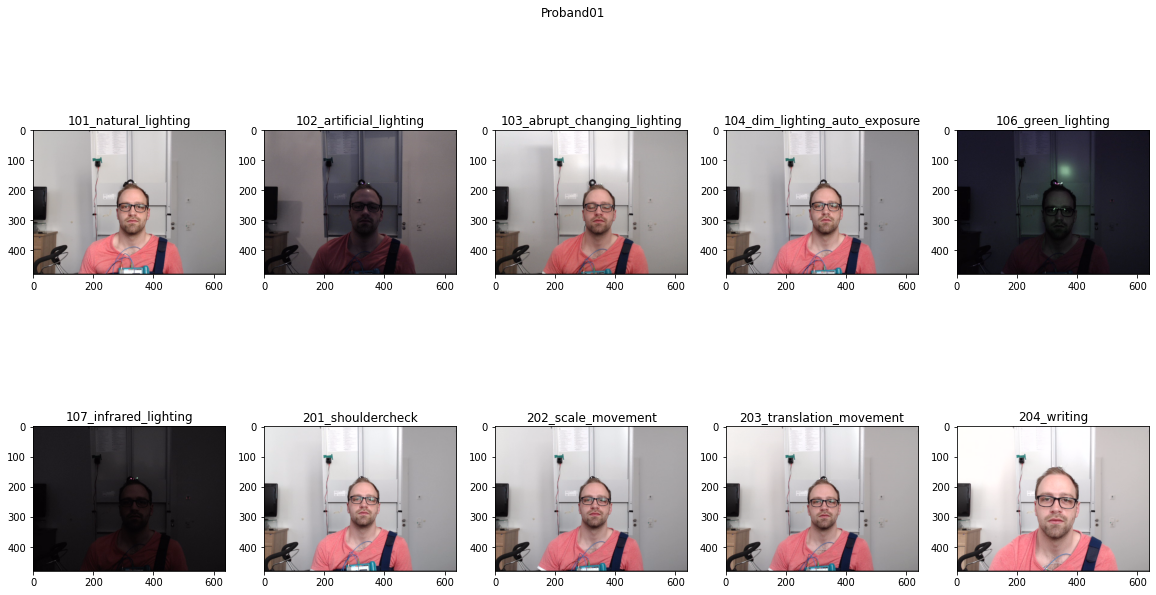

In [31]:
import matplotlib.pyplot as plt
import cv2

for subject in subjects:
    subject_path = os.path.join(data_path, subject)

    # Create a figure with 2 rows and 4 columns
    fig, axs = plt.subplots(2, 5, figsize=(20, 10))

    for idx, scenario in enumerate(scenarios):
        scenario_path = os.path.join(subject_path, scenario)
        video_path = os.path.join(scenario_path, 'Logitech HD Pro Webcam C920.avi')

        # Read the first frame of the video
        cap = cv2.VideoCapture(video_path)
        ret, frame = cap.read()
        cap.release()

        # Plot the frame
        ax = axs[idx // 5, idx % 5]
        ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        ax.set_title(scenario)

    plt.suptitle(subject)
    plt.show()

    break

## Display all the subjects in a single figure

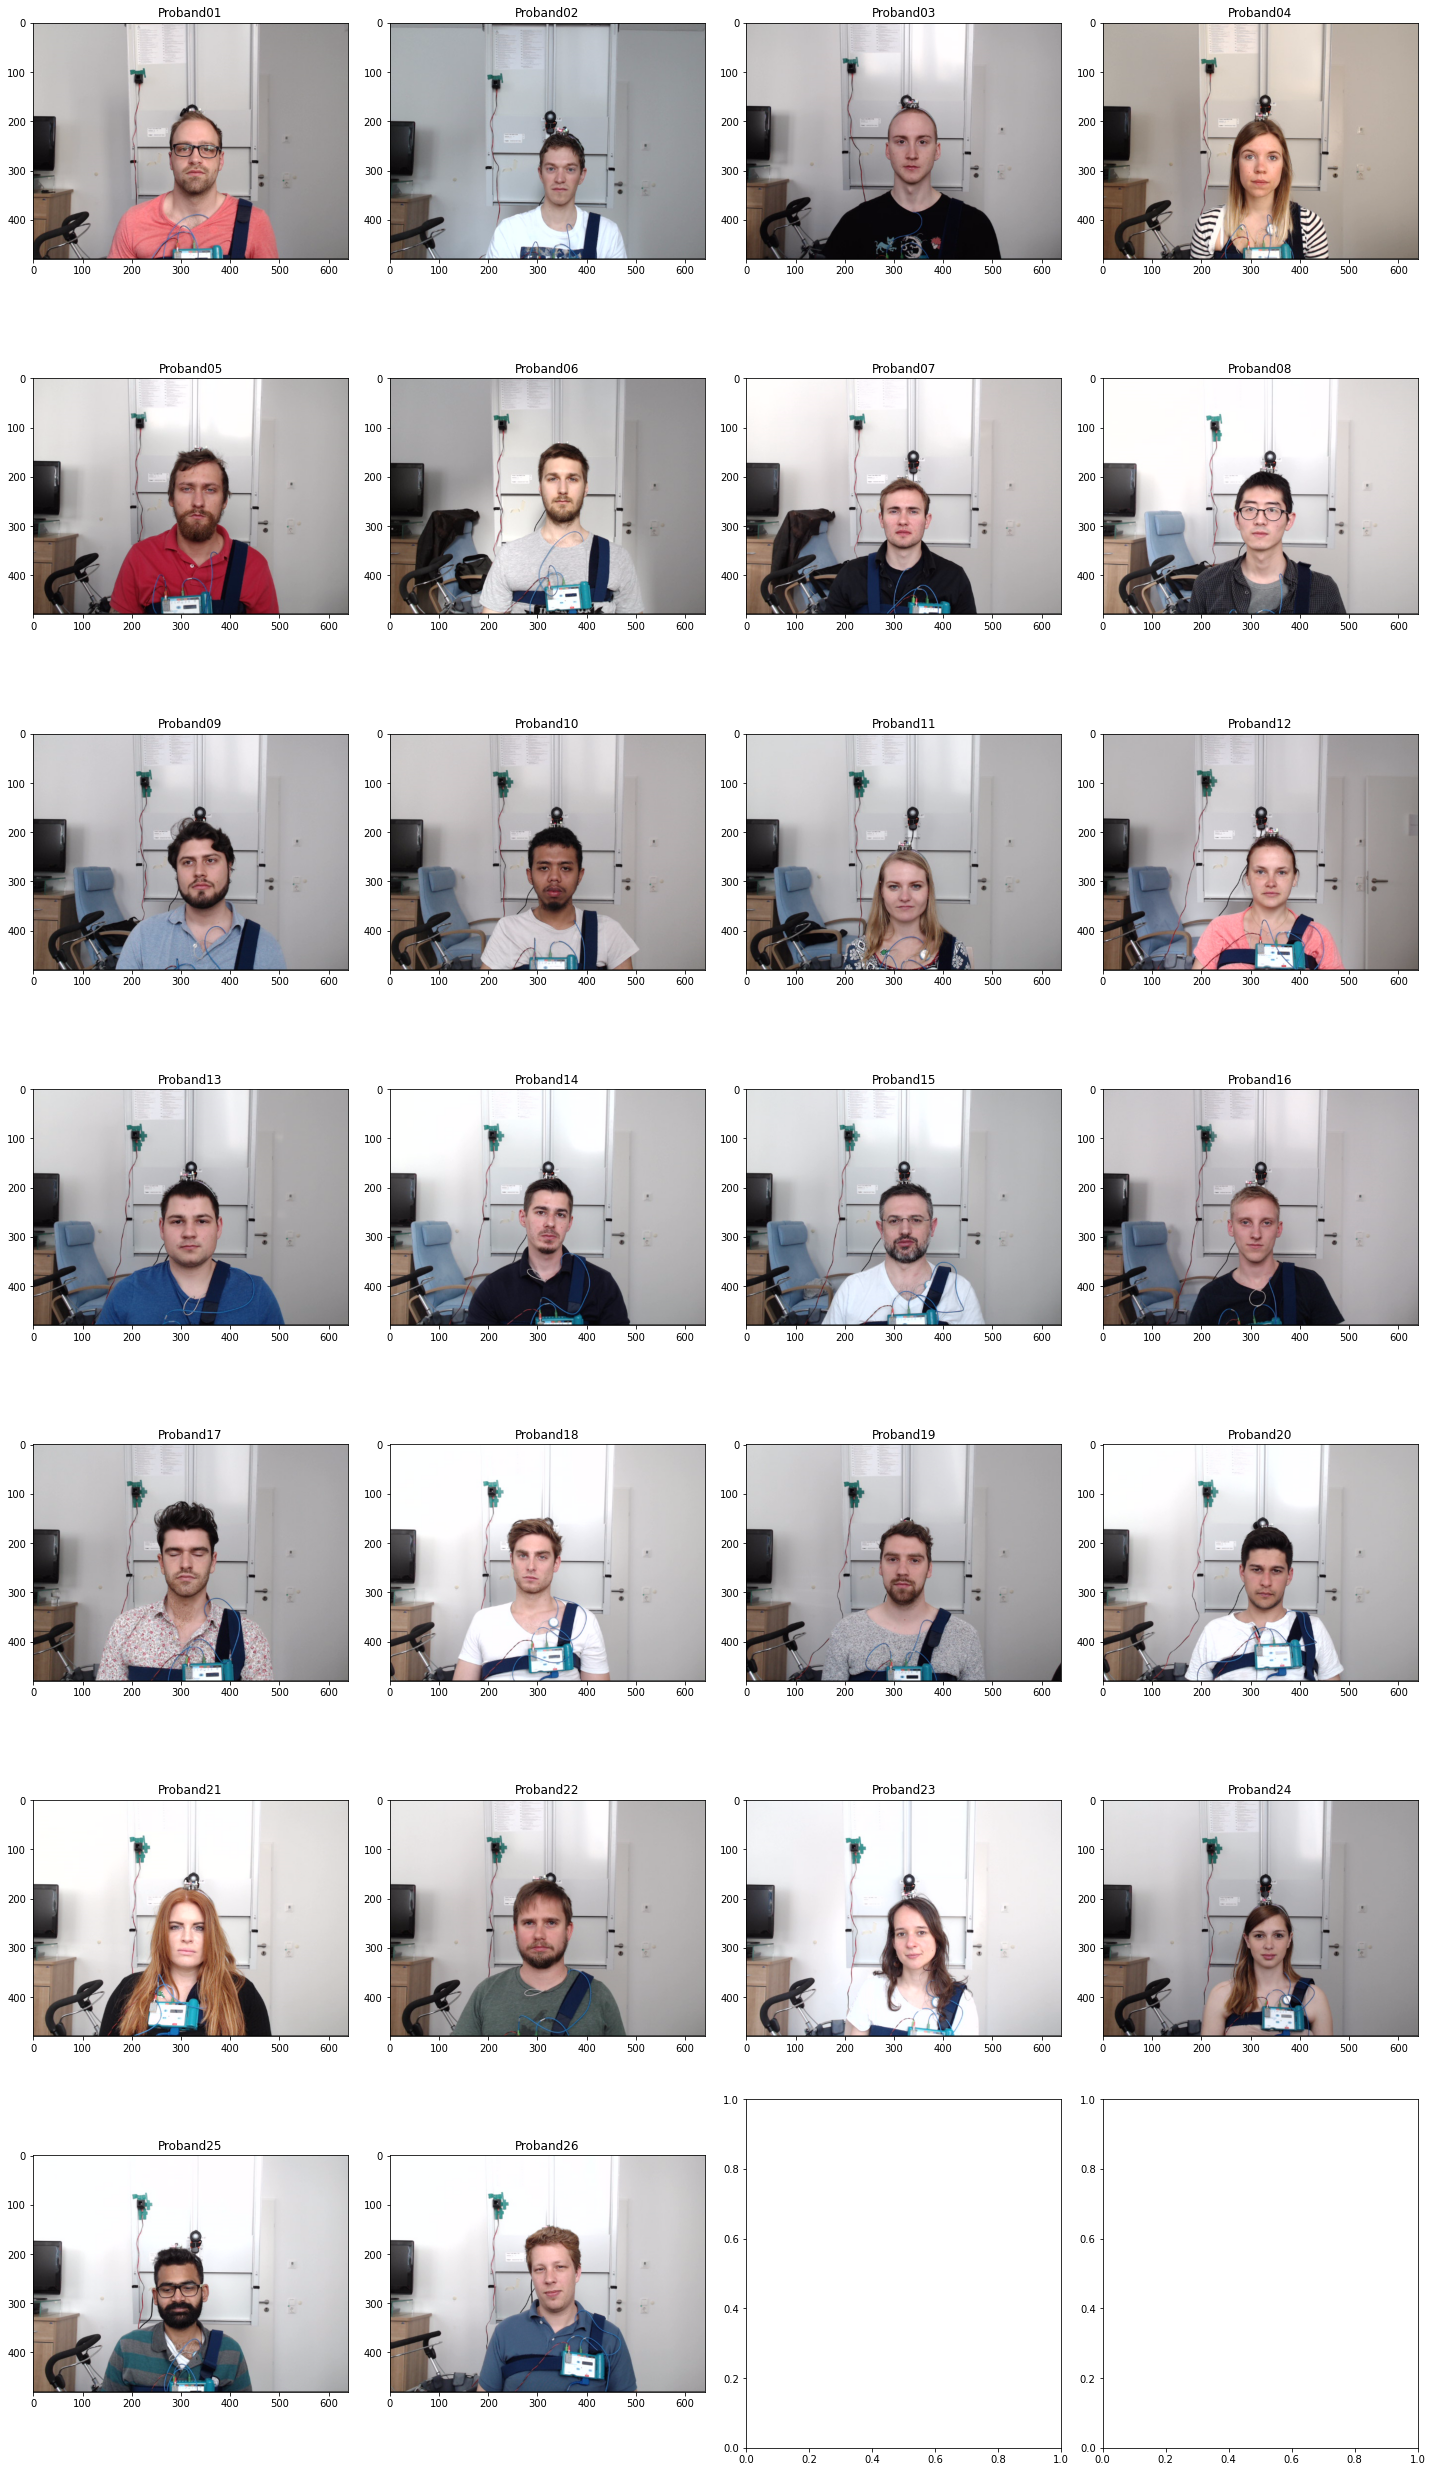

In [32]:
subject_count = len(subjects)
frames_per_row = 4
row_count = subject_count // frames_per_row + 1

# Create a figure for each subject, display not more than 5 scenarios per row
fig, axs = plt.subplots(row_count, frames_per_row, figsize=(20, 5 * row_count))

for idx, subject in enumerate(subjects):
    subject_path = os.path.join(data_path, subject)

    scenario = scenarios[0]
    scenario_path = os.path.join(subject_path, scenario)
    video_path = os.path.join(scenario_path, 'Logitech HD Pro Webcam C920.avi')

    # Read the first frame of the video
    cap = cv2.VideoCapture(video_path)
    ret, frame = cap.read()
    cap.release()

    # Plot the frame
    ax = axs[idx // frames_per_row, idx % frames_per_row]
    ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    ax.set_title(subject)

fig.tight_layout()
plt.show()